In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import requests

%matplotlib inline

### EDA

In [3]:
gc_members = pd.read_csv('../Data Files/NSS_GreatCare_Members.csv')
admissions = pd.read_csv('../Data Files/NSS_Hospital_Inpatient_Admissions.csv')
pc_visits = pd.read_csv('../Data Files/NSS_PrimaryCare_Office_Visits.csv')

C:\Users\darcy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
admissions = admissions.astype({'Attending Provider NPI':object, 
                                'Encounter Start Date':'datetime64[ns]',
                                'Encounter End Date':'datetime64[ns]',
                                'CMS Admit Type Code':object,
                                'CMS Patient Discharge Status Code':object,
                                'CMS Place of Service Code':object})
pc_visits = pc_visits.astype({'Attending Provider NPI':object, 
                              'Facility Provider NPI':object, 
                              'Service Provider NPI':object, 
                              'Provider Group NPI':object,
                              'Encounter Date':'datetime64[ns]'})
gc_members = gc_members.astype({'Patient Date of Birth':'datetime64[ns]',
                                'Patient ZIP Code 5-Digit':object,
                                'Administratively Assigned PCP Provider NPI':object,
                                'Empirically Attributed PCP Individual Provider NPI':object,
                                'Empirically Attributed PCP Group Provider NPI':object,
                                'Primary Payor Description':object,
                                'CMS Dual Status Code':object,
                                'Period Start Date':'datetime64[ns]',
                                'Period End Date':'datetime64[ns]'})

In [5]:
admissions.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.41717e+09,1306890389,2013-01-12,2013-01-14,...,1,1,21,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.6696e+09,1902803315,2014-01-05,2014-01-12,...,1,1,21,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.40788e+09,1902803315,2012-06-13,2012-06-21,...,1,1,21,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.40701e+09,1427055839,2012-12-06,2012-12-09,...,1,1,21,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.51805e+09,1992818256,2015-03-11,2015-03-14,...,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0


In [6]:
admissions.columns

Index(['Encounter ID', 'Patient ID', 'Encounter Primary Payor ID',
       'Encounter Primary Plan ID', 'Facility Provider ID',
       'Attending Provider ID', 'Attending Provider NPI',
       'Facility Provider NPI', 'Encounter Start Date', 'Encounter End Date',
       'Is Emergency Department Visit Parent Encounter',
       'Is Observation Stay Parent Encounter', 'CMS Admit Type Code',
       'CMS Admit Source Code', 'CMS Patient Discharge Status Code',
       'CMS Place of Service Code',
       'Principal Discharge Diagnosis ICD-9-CM Code',
       'Principal Discharge Diagnosis ICD-9-CM Description',
       'Principal Discharge Diagnosis ICD-10-CM Code',
       'Principal Discharge Diagnosis ICD-10-CM Description',
       'Primary Plan Allowed Amount', 'Primary Plan Paid Amount',
       'Patient Paid Amount'],
      dtype='object')

In [7]:
admissions.shape

(6213, 23)

In [8]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.48786e+09,1.04343e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.52803e+09,1.9028e+09,1.52803e+09,1.04343e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.47758e+09,1.04343e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.82118e+09,1.10484e+09,1.82118e+09,1.40706e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609e+09,1.18472e+09,2016-09-04,0,1,0,0,NaN


In [9]:
gc_members.head()

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider in Last 36 Months,Count Visits with Attributee Primary Care Provider Group in Last 36 Months,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01,2013-04-11
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10,2013-01-01
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18,2015-05-18
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01,2010-04-09
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01,2012-10-02


### 1. What is our 30-day all cause readmission rate across hospitals our members are admitted to?

For each index event that each patient has, get only the **first** readmission within the 30 days following that index event.

#### Mean readmission rate

In [10]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 23), (6149, 23))

In [11]:
def categorize_events(patient_admissions):
    patient_index_events = 0
    patient_readmission_events = 0
    last_index_event_discharge_date = None
    readmission = False
    for ind, row in patient_admissions.iterrows():
        ##set first event as an intiial event or a non-qualifying readmission as initial event
        if patient_index_events == 0 or row['Encounter Start Date'] > last_index_event_discharge_date + dt.timedelta(days=30):
            patient_index_events += 1
            last_index_event_discharge_date = row['Encounter End Date']
            readmission = False
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'index'
        ##check if qualifying readmission and change readmit status of most recently added initial event to true
        elif readmission == False:
            patient_readmission_events += 1
            readmission = True
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'readmission'
        ##check for duplicate readmission
        else:
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'duplicate readmission'
            
    return patient_index_events, patient_readmission_events

In [12]:
total_index_events = 0
total_index_events_leading_to_readmission = 0

for patient in admissions_dedup['Patient ID'].unique():
    patient_admissions = admissions_dedup[admissions['Patient ID']==patient]
    times_admitted = patient_admissions.shape[0]
    if times_admitted > 1:
        patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
        ind, re = categorize_events(patient_admissions)
        total_index_events += ind
        total_index_events_leading_to_readmission += re
    else:
        encounter_id = patient_admissions['Encounter ID'].values[0]
        admissions.loc[admissions['Encounter ID'] == encounter_id, 'type'] = 'index'
        total_index_events += 1
print("Total Index Events:",total_index_events) 
print("Index Events Leading to Readmission:", total_index_events_leading_to_readmission)
print(str.format("Readmission Rate: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))

<ipython-input-12-b229257dddde>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patient_admissions = admissions_dedup[admissions['Patient ID']==patient]
<ipython-input-12-b229257dddde>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 5536
Index Events Leading to Readmission: 527
Readmission Rate: 9.52%


#### Readmission rate by month (COME BACK LATER)

In [13]:
readmissions = admissions[admissions.type == 'readmission']

In [14]:
readmissions['year'] = readmissions['Encounter Start Date'].dt.year
readmissions['month'] = readmissions['Encounter Start Date'].dt.month
readmissions['readmission_month'] = pd.to_datetime(readmissions[['year', 'month']].assign(DAY=1))

<ipython-input-14-b538a74de00a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmissions['year'] = readmissions['Encounter Start Date'].dt.year
<ipython-input-14-b538a74de00a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmissions['month'] = readmissions['Encounter Start Date'].dt.month
<ipython-input-14-b538a74de00a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [15]:
# just realized this needs to be readmission rate, not readmission count
readmissions_counts = readmissions.readmission_month.value_counts()
readmissions_counts = readmissions_counts.reset_index()
readmissions_counts.columns = ['month','count']
readmissions_counts

,month,count
0,2013-02-01,13
1,2012-06-01,12
2,2014-01-01,12
3,2014-09-01,11
4,2013-03-01,11
...,...,...
90,2016-01-01,1
91,2010-09-01,1
92,2018-05-01,1
93,2016-07-01,1


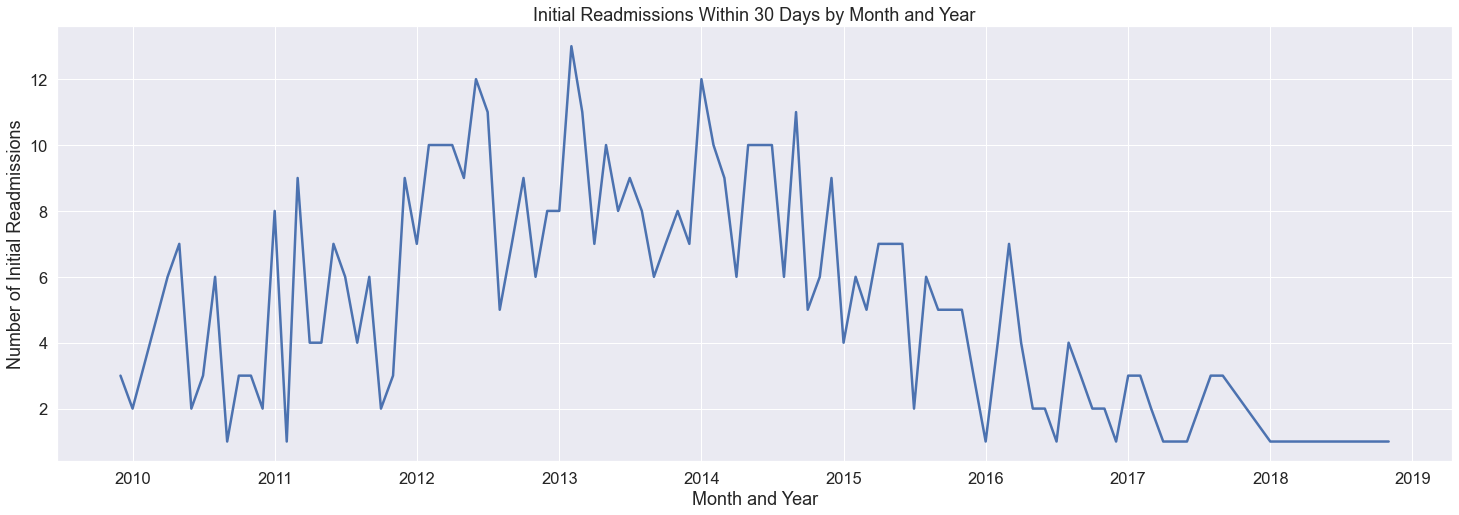

In [16]:
plt.figure(figsize = (25, 8))
sns.set(style="darkgrid", font_scale=1.5)
sns.lineplot(x = 'month', y = 'count', data = readmissions_counts, linewidth=2.5)
plt.xlabel('Month and Year')
plt.ylabel('Number of Initial Readmissions')
plt.title('Initial Readmissions Within 30 Days by Month and Year');

#### Readmission Rate by Hospital (COME BACK LATER)

### 2. What percent of patients have a PCP visit within a week of discharge?

In [17]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.48786e+09,1.04343e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.52803e+09,1.9028e+09,1.52803e+09,1.04343e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.47758e+09,1.04343e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.82118e+09,1.10484e+09,1.82118e+09,1.40706e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609e+09,1.18472e+09,2016-09-04,0,1,0,0,NaN


In [18]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 24), (6149, 24))

In [19]:
total_hospital_visits = 0
total_pcp_visits_in_7_days = 0

for ind, row in admissions_dedup.iterrows():
    total_hospital_visits += 1
    patient = row['Patient ID']
    discharge_date = row['Encounter End Date']
    
    for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
        if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
            total_pcp_visits_in_7_days += 1
            break
print('Total Hospital Visits: ', total_hospital_visits)
print('Total PCP Visits in 7 Days: ', total_pcp_visits_in_7_days)
print(str.format("PCP Visit Rate: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))

Total Hospital Visits:  6149
Total PCP Visits in 7 Days:  1860
PCP Visit Rate: 30.25%


### 3. Do either vary by individual or group PCP's?

Individual PCP: All the values in the ‘Service Provider NPI’ column in the Primary car office visits .csv. This column would simply filter out all blanks.

Group PCP: This would pull from the Group Provider NPI column and would filter out all blanks as well as all instances where the Group NPI and the Service NPI are the same.

In [21]:
pc_visits['individual'] = ""
pc_visits['group'] = ""

In [ ]:
for ind, row in pc_visits.iterrows():
    service_npi = row['Service Provider NPI']
    group_npi = row['Provider Group NPI']
    
    if service_npi != None:
        pc_visits.loc[pc_visits['Encounter ID'] == row['Encounter ID'], 'individual'] = service_npi

#### API

In [ ]:
endpoint = 'https://npiregistry.cms.hhs.gov/api/?version=2.0'
params = {'number': 1487856779,'limit':200}
response = requests.get(endpoint, params = params)
response 

In [ ]:
result = response.json()
result